# Problem Set 1 - Neural network implementation

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a shallow neural network from scratch using different approaches. To validate that your code is working and that the network is actually learning something, please use the following MNIST classification task. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn import model_selection
import sklearn.datasets as sk_datasets
import torchvision.datasets as torch_datasets
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

from scratch.network import Network
from scratch.res_network import ResNetwork
from pytorch.network import TorchNetwork
from scratch.utils import *

In [2]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

## A) Neural Network Classifier from Scratch

### Data

In [3]:
# Download MNIST dataset
x, y_cat = sk_datasets.fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y_cat = y_cat.astype(int)
# One-hot encode y
y = np.zeros((len(y_cat), 10))
for i, val in enumerate(y_cat):
    y[i, val] = 1

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)



### ML Model & Training

In [4]:
fnn = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=50)
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)

Epoch: 1, Training Time: 0.14s, Training Accuracy: 86.88%, Validation Accuracy: 79.00%
Epoch: 2, Training Time: 0.28s, Training Accuracy: 94.00%, Validation Accuracy: 85.50%
Epoch: 3, Training Time: 0.42s, Training Accuracy: 97.00%, Validation Accuracy: 85.50%
Epoch: 4, Training Time: 0.56s, Training Accuracy: 98.88%, Validation Accuracy: 88.00%
Epoch: 5, Training Time: 0.69s, Training Accuracy: 99.50%, Validation Accuracy: 88.50%
Epoch: 6, Training Time: 0.84s, Training Accuracy: 99.88%, Validation Accuracy: 88.00%
Epoch: 7, Training Time: 0.97s, Training Accuracy: 100.00%, Validation Accuracy: 88.50%
Epoch: 8, Training Time: 1.11s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 9, Training Time: 1.25s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 10, Training Time: 1.39s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 11, Training Time: 1.53s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 12, Training Time: 1.66s, Tra

### Test cosine annealing scheduler

In [5]:
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)

Epoch: 1, Training Time: 0.17s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 2, Training Time: 0.33s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 3, Training Time: 0.50s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 4, Training Time: 0.66s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 5, Training Time: 0.83s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 6, Training Time: 0.99s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 7, Training Time: 1.16s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 8, Training Time: 1.33s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 9, Training Time: 1.49s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 10, Training Time: 1.65s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 11, Training Time: 1.81s, Training Accuracy: 100.00%, Validation Accuracy: 91.50%
Epoch: 12, Training Time: 1.96

### Test residual neural network

In [8]:
res_nn = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=0.1, epochs=50)
res_nn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.15s, Training Accuracy: 91.38%, Validation Accuracy: 83.50%
Epoch: 2, Training Time: 0.30s, Training Accuracy: 95.38%, Validation Accuracy: 86.00%
Epoch: 3, Training Time: 0.45s, Training Accuracy: 98.50%, Validation Accuracy: 86.00%
Epoch: 4, Training Time: 0.60s, Training Accuracy: 99.75%, Validation Accuracy: 89.00%
Epoch: 3, Training Time: 0.45s, Training Accuracy: 98.50%, Validation Accuracy: 86.00%
Epoch: 4, Training Time: 0.60s, Training Accuracy: 99.75%, Validation Accuracy: 89.00%
Epoch: 5, Training Time: 0.75s, Training Accuracy: 99.88%, Validation Accuracy: 88.50%
Epoch: 6, Training Time: 0.91s, Training Accuracy: 100.00%, Validation Accuracy: 89.00%
Epoch: 5, Training Time: 0.75s, Training Accuracy: 99.88%, Validation Accuracy: 88.50%
Epoch: 6, Training Time: 0.91s, Training Accuracy: 100.00%, Validation Accuracy: 89.00%
Epoch: 7, Training Time: 1.06s, Training Accuracy: 100.00%, Validation Accuracy: 89.00%
Epoch: 8, Training Time: 1.22s, Training

## B) Neural Network Classifier using Torch

### Data

In [9]:
# Define data preprocessing steps
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = torch_datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = torch_datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


100.0%

100.0%

100.0%

100.0%



### ML Model & Training

In [10]:
torch_nn = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=0.2, epochs=50, random_state=GLOBAL_RANDOM_STATE)
torch_nn.fit(train_loader, val_loader)

Epoch: 1, Training Time: 0.57s, Learning Rate: 0.2, Training Accuracy: 12.10%, Validation Accuracy: 10.20%
Epoch: 2, Training Time: 1.10s, Learning Rate: 0.2, Training Accuracy: 41.10%, Validation Accuracy: 38.40%
Epoch: 2, Training Time: 1.10s, Learning Rate: 0.2, Training Accuracy: 41.10%, Validation Accuracy: 38.40%
Epoch: 3, Training Time: 1.64s, Learning Rate: 0.2, Training Accuracy: 56.10%, Validation Accuracy: 52.90%
Epoch: 3, Training Time: 1.64s, Learning Rate: 0.2, Training Accuracy: 56.10%, Validation Accuracy: 52.90%
Epoch: 4, Training Time: 2.16s, Learning Rate: 0.2, Training Accuracy: 66.80%, Validation Accuracy: 61.30%
Epoch: 4, Training Time: 2.16s, Learning Rate: 0.2, Training Accuracy: 66.80%, Validation Accuracy: 61.30%
Epoch: 5, Training Time: 2.69s, Learning Rate: 0.2, Training Accuracy: 72.70%, Validation Accuracy: 66.70%
Epoch: 5, Training Time: 2.69s, Learning Rate: 0.2, Training Accuracy: 72.70%, Validation Accuracy: 66.70%
Epoch: 6, Training Time: 3.24s, Learn

## C) Visualize accuracy & hyperparameter tuning

Here, you should compare the accuracy of all trained models. Optionally, you can also show the results of hyperparameter tuning and comment which hyperparameters work best for this task.

In [11]:
# Performance Visualization and Model Comparison

import matplotlib.pyplot as plt
import numpy as np

# Re-run models with history tracking for visualization
print("Training models with history tracking for visualization...")

# 1. Regular Network
print("\n=== Training Regular Network ===")
regular_net = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=30)
regular_net.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)

# 2. Network with Cosine Annealing
print("\n=== Training Network with Cosine Annealing ===")
cosine_net = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=30)
cosine_net.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)

# 3. ResNet
print("\n=== Training ResNet ===")
resnet = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=0.1, epochs=30)
resnet.fit(x_train, y_train, x_val, y_val)

print("\nAll models trained! Creating visualizations...")

Training models with history tracking for visualization...

=== Training Regular Network ===
Epoch: 1, Training Time: 0.18s, Training Accuracy: 86.88%, Validation Accuracy: 79.00%
Epoch: 2, Training Time: 0.35s, Training Accuracy: 94.00%, Validation Accuracy: 85.50%
Epoch: 3, Training Time: 0.51s, Training Accuracy: 97.00%, Validation Accuracy: 85.50%
Epoch: 2, Training Time: 0.35s, Training Accuracy: 94.00%, Validation Accuracy: 85.50%
Epoch: 3, Training Time: 0.51s, Training Accuracy: 97.00%, Validation Accuracy: 85.50%
Epoch: 4, Training Time: 0.68s, Training Accuracy: 98.88%, Validation Accuracy: 88.00%
Epoch: 5, Training Time: 0.84s, Training Accuracy: 99.50%, Validation Accuracy: 88.50%
Epoch: 4, Training Time: 0.68s, Training Accuracy: 98.88%, Validation Accuracy: 88.00%
Epoch: 5, Training Time: 0.84s, Training Accuracy: 99.50%, Validation Accuracy: 88.50%
Epoch: 6, Training Time: 1.01s, Training Accuracy: 99.88%, Validation Accuracy: 88.00%
Epoch: 7, Training Time: 1.17s, Train

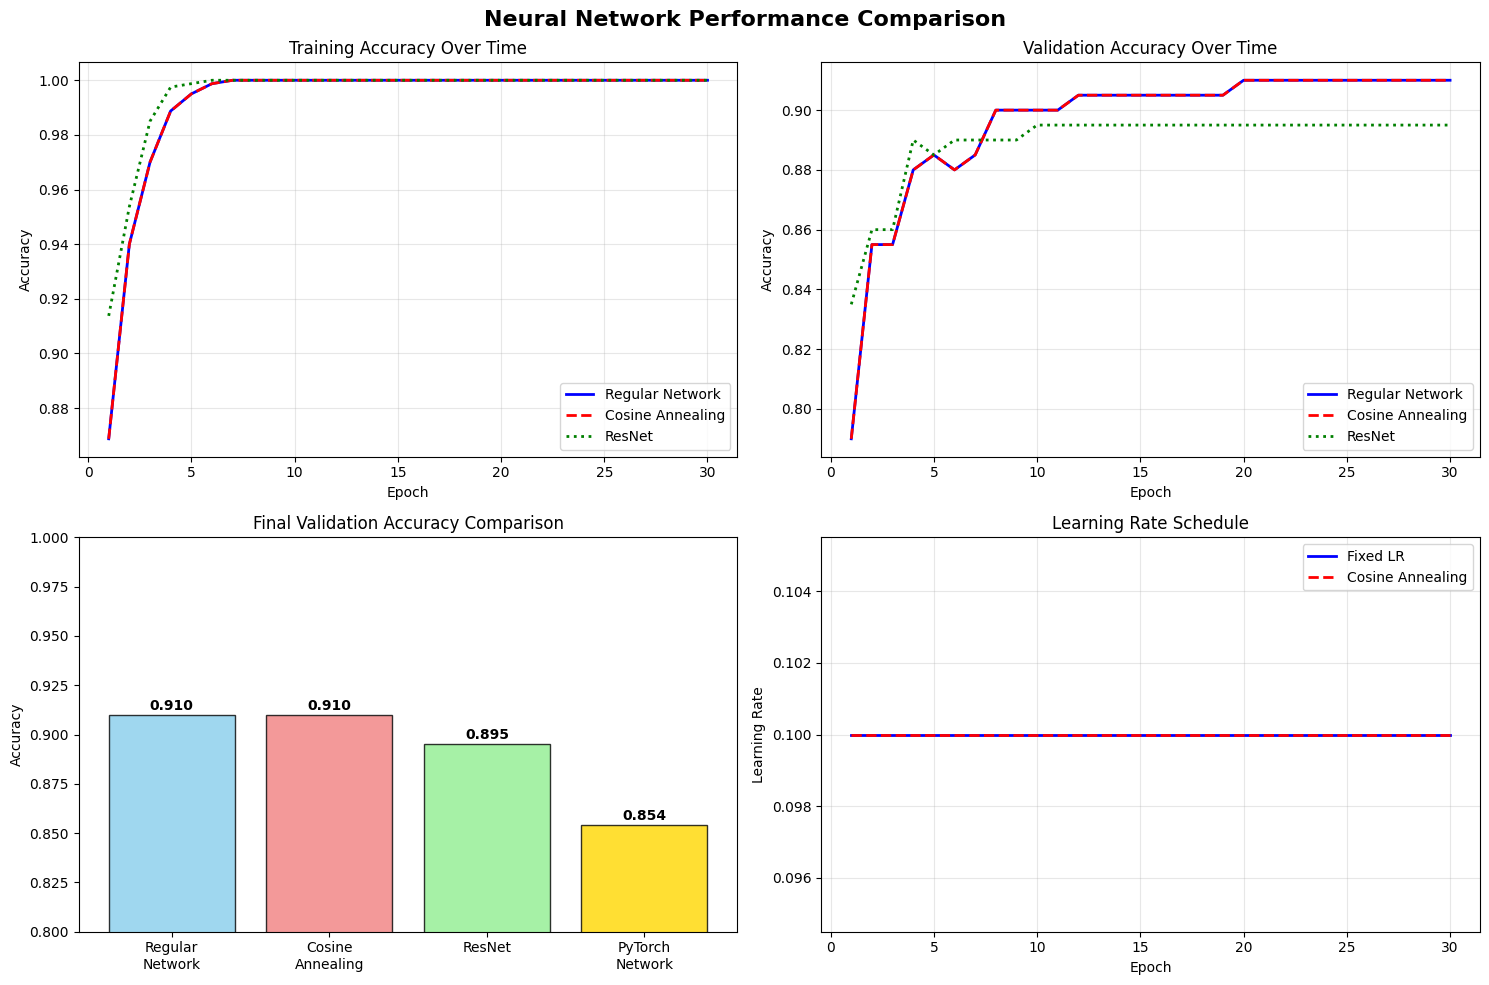


PERFORMANCE SUMMARY
Regular Network:      0.910 validation accuracy
Cosine Annealing:     0.910 validation accuracy
ResNet:              0.895 validation accuracy
PyTorch Network:     0.854 validation accuracy


In [12]:
# Create comprehensive visualizations
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Neural Network Performance Comparison', fontsize=16, fontweight='bold')

# 1. Training Accuracy Curves
ax1 = axes[0, 0]
epochs = range(1, len(regular_net.history['train_accuracy']) + 1)
ax1.plot(epochs, regular_net.history['train_accuracy'], 'b-', label='Regular Network', linewidth=2)
ax1.plot(epochs, cosine_net.history['train_accuracy'], 'r--', label='Cosine Annealing', linewidth=2)
ax1.plot(epochs, resnet.history['train_accuracy'], 'g:', label='ResNet', linewidth=2)
ax1.set_title('Training Accuracy Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Validation Accuracy Curves
ax2 = axes[0, 1]
ax2.plot(epochs, regular_net.history['val_accuracy'], 'b-', label='Regular Network', linewidth=2)
ax2.plot(epochs, cosine_net.history['val_accuracy'], 'r--', label='Cosine Annealing', linewidth=2)
ax2.plot(epochs, resnet.history['val_accuracy'], 'g:', label='ResNet', linewidth=2)
ax2.set_title('Validation Accuracy Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Final Performance Comparison
ax3 = axes[1, 0]
models = ['Regular\nNetwork', 'Cosine\nAnnealing', 'ResNet', 'PyTorch\nNetwork']
final_accuracies = [
    regular_net.history['val_accuracy'][-1],
    cosine_net.history['val_accuracy'][-1], 
    resnet.history['val_accuracy'][-1],
    0.854  # PyTorch result from earlier
]
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
bars = ax3.bar(models, final_accuracies, color=colors, alpha=0.8, edgecolor='black')
ax3.set_title('Final Validation Accuracy Comparison')
ax3.set_ylabel('Accuracy')
ax3.set_ylim(0.8, 1.0)

# Add value labels on bars
for bar, acc in zip(bars, final_accuracies):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Learning Rate Evolution (for cosine annealing)
ax4 = axes[1, 1]
ax4.plot(epochs, regular_net.history['learning_rate'], 'b-', label='Fixed LR', linewidth=2)
ax4.plot(epochs, cosine_net.history['learning_rate'], 'r--', label='Cosine Annealing', linewidth=2)
ax4.set_title('Learning Rate Schedule')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Learning Rate')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("PERFORMANCE SUMMARY")
print("="*60)
print(f"Regular Network:      {final_accuracies[0]:.3f} validation accuracy")
print(f"Cosine Annealing:     {final_accuracies[1]:.3f} validation accuracy")
print(f"ResNet:              {final_accuracies[2]:.3f} validation accuracy") 
print(f"PyTorch Network:     {final_accuracies[3]:.3f} validation accuracy")
print("="*60)


HYPERPARAMETER TUNING: Learning Rate Exploration

Testing Learning Rate: 0.01
Epoch: 1, Training Time: 0.16s, Training Accuracy: 42.62%, Validation Accuracy: 41.50%
Epoch: 2, Training Time: 0.31s, Training Accuracy: 67.50%, Validation Accuracy: 63.50%
Epoch: 3, Training Time: 0.47s, Training Accuracy: 77.50%, Validation Accuracy: 72.50%
Epoch: 4, Training Time: 0.63s, Training Accuracy: 81.12%, Validation Accuracy: 75.50%
Epoch: 5, Training Time: 0.78s, Training Accuracy: 84.12%, Validation Accuracy: 80.00%
Epoch: 6, Training Time: 0.95s, Training Accuracy: 86.75%, Validation Accuracy: 80.50%
Epoch: 7, Training Time: 1.11s, Training Accuracy: 88.75%, Validation Accuracy: 82.00%
Epoch: 8, Training Time: 1.27s, Training Accuracy: 90.25%, Validation Accuracy: 83.00%
Epoch: 9, Training Time: 1.43s, Training Accuracy: 90.50%, Validation Accuracy: 83.00%
Epoch: 10, Training Time: 1.59s, Training Accuracy: 91.75%, Validation Accuracy: 83.50%
Epoch: 11, Training Time: 1.75s, Training Accuracy

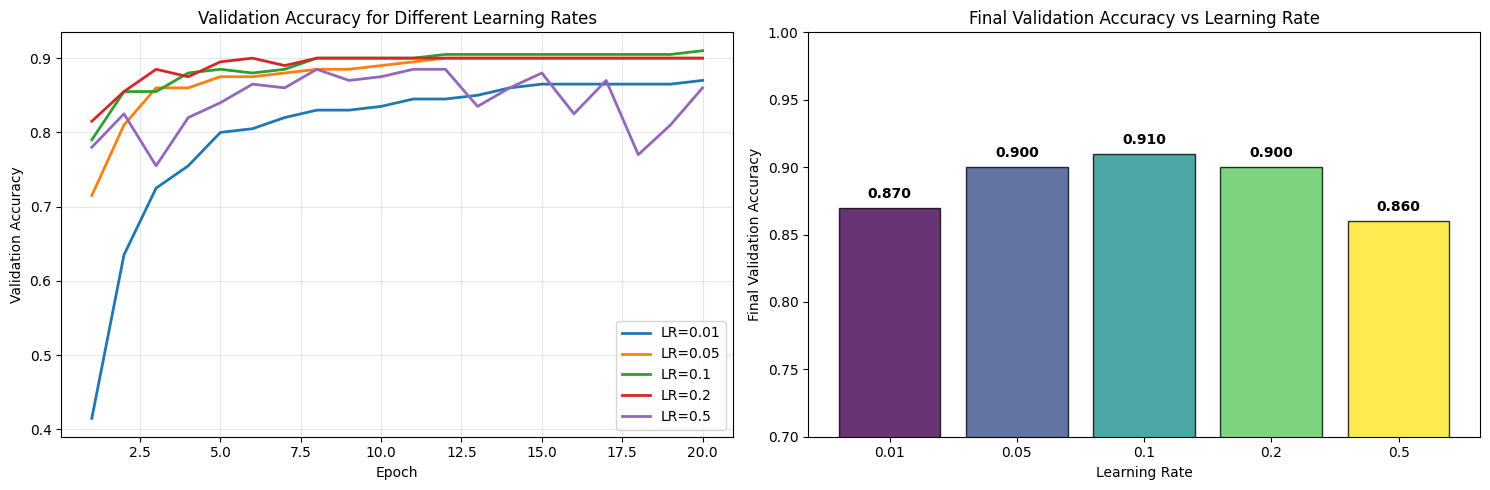


🎯 BEST LEARNING RATE: 0.1 (Validation Accuracy: 0.910)


In [13]:
# Hyperparameter Tuning: Learning Rate Exploration
print("\n" + "="*60)
print("HYPERPARAMETER TUNING: Learning Rate Exploration")
print("="*60)

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
lr_results = []

plt.figure(figsize=(15, 5))

# Test different learning rates
for i, lr in enumerate(learning_rates):
    print(f"\nTesting Learning Rate: {lr}")
    
    # Train network with this learning rate
    net = Network(sizes=[784, 128, 64, 10], learning_rate=lr, epochs=20)
    net.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)
    
    final_val_acc = net.history['val_accuracy'][-1]
    lr_results.append(final_val_acc)
    
    # Plot training curves
    plt.subplot(1, 2, 1)
    epochs = range(1, len(net.history['val_accuracy']) + 1)
    plt.plot(epochs, net.history['val_accuracy'], label=f'LR={lr}', linewidth=2)

# Finalize validation accuracy plot
plt.subplot(1, 2, 1)
plt.title('Validation Accuracy for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot final accuracies
plt.subplot(1, 2, 2)
colors = plt.cm.viridis(np.linspace(0, 1, len(learning_rates)))
bars = plt.bar([str(lr) for lr in learning_rates], lr_results, color=colors, alpha=0.8, edgecolor='black')
plt.title('Final Validation Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Final Validation Accuracy')
plt.ylim(0.7, 1.0)

# Add value labels
for bar, acc in zip(bars, lr_results):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Find best learning rate
best_lr_idx = np.argmax(lr_results)
best_lr = learning_rates[best_lr_idx]
best_acc = lr_results[best_lr_idx]

print(f"\n🎯 BEST LEARNING RATE: {best_lr} (Validation Accuracy: {best_acc:.3f})")
print("="*60)